In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("test.csv")


In [ ]:
df1 = pd.read_csv("dataset.csv")

In [ ]:
import seaborn as sns
import neattext.functions as nfx

In [ ]:
df1.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [ ]:
df1.shape
df1.dtypes

Emotion    object
Text       object
dtype: object

In [ ]:
df1.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [ ]:
df1['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:>

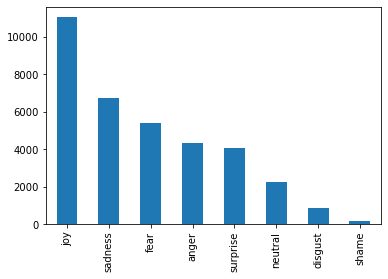

In [ ]:
df1['Emotion'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Emotion', ylabel='count'>

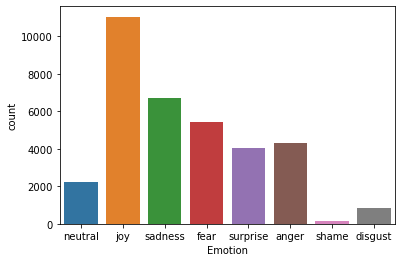

In [ ]:
sns.countplot(x='Emotion', data=df1)

In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0 :
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else :
        result = "Neutral"
    return result

In [ ]:
get_sentiment('you are not that great')

'Positive'

In [ ]:
df1['Sentiment'] = df1['Text'].apply(get_sentiment)

In [ ]:
df1.head(20) 

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral
5,fear,I'm expecting an extremely important phonecall...,Positive
6,sadness,.Couldnt wait to see them live. If missing th...,Negative
7,surprise,maken Tip 2: Stop op een moment dat je het hel...,Neutral
8,surprise,En dan krijg je ff een cadeautje van een tweep...,Neutral
9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...,Neutral


<AxesSubplot:xlabel='Emotion,Sentiment'>

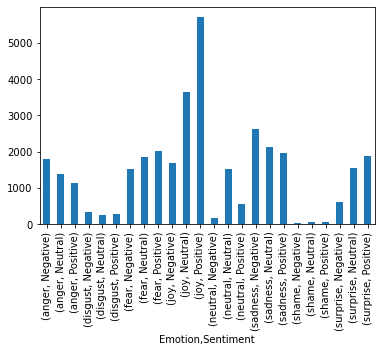

In [ ]:
df1.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

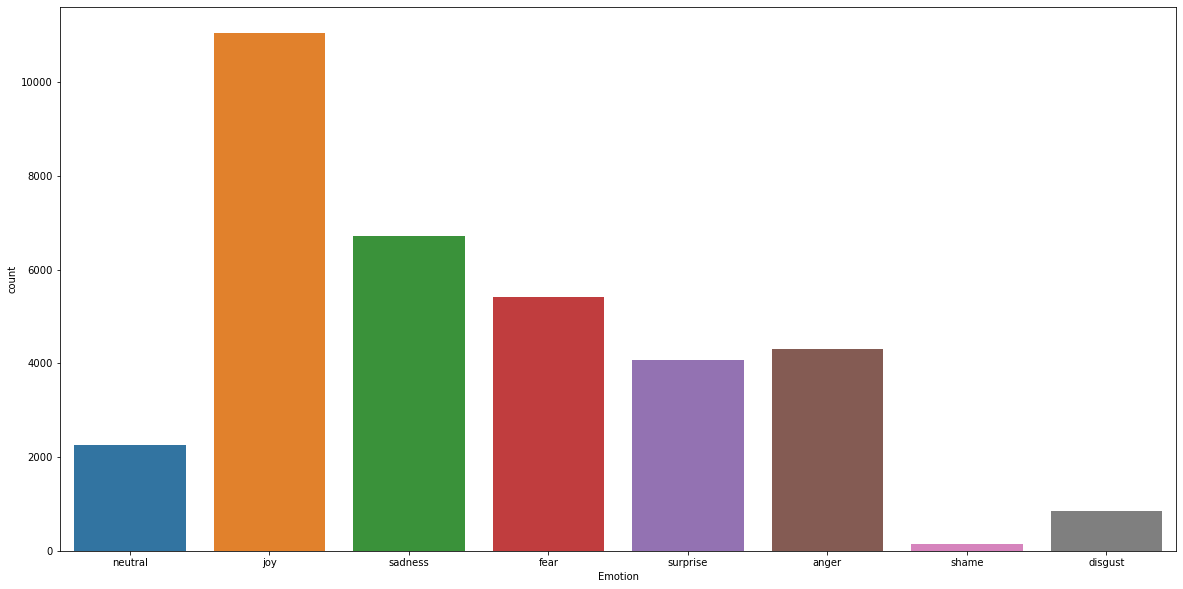

In [ ]:
# plt.figure(figsize=(20,10))
# sns.countplot(x='Emotion',data=df1)
# plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


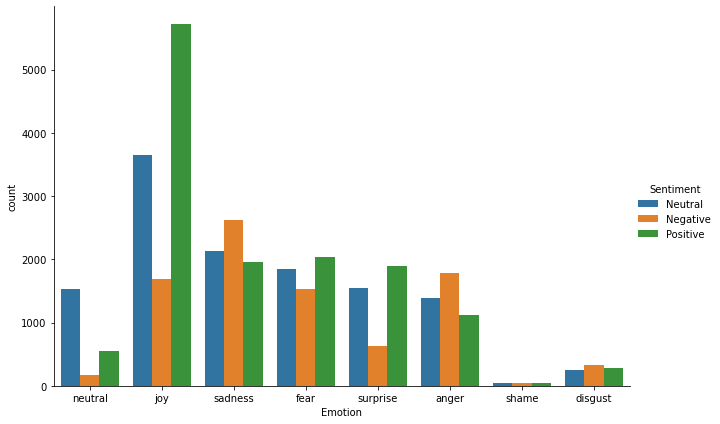

In [ ]:
sns.factorplot(x='Emotion', hue='Sentiment',data=df1 , kind='count',size=6,aspect =1.5)


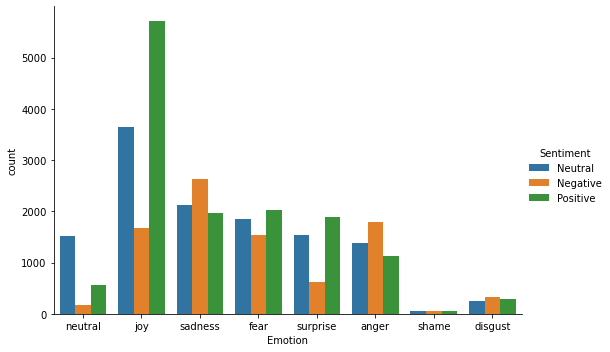

In [ ]:
sns.catplot(x='Emotion', hue='Sentiment',data=df1 , kind='count',aspect =1.5)


In [ ]:
df1['Clened_text'] = df1['Text'].apply(nfx.remove_stopwords)

In [ ]:
df1['Clened_text'] = df1['Clened_text'].apply(nfx.remove_punctuations)

In [ ]:
df1['Clened_text'] = df1['Clened_text'].apply(nfx.remove_userhandles)

In [ ]:
df1[['Text','Clened_text']]

,Text,Clened_text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [ ]:
from collections import Counter

In [ ]:
def extract_keywords(text,num=50):
    tokens = [ tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [ ]:
emotion_list  = df1['Emotion'].unique().tolist()

In [ ]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [ ]:
joy_list= df1[df1['Emotion'] == 'fear']['Clened_text'].tolist()

In [ ]:
joy_docx = ' '.join(joy_list)

In [ ]:
keyword_joy = extract_keywords(joy_docx)

In [ ]:
keyword_joy

{'afraid': 565,
 'love': 432,
 'today': 404,
 'tomorrow': 399,
 'fear': 396,
 'seen': 364,
 'yesterday': 352,
 'time': 256,
 'Im': 244,
 'night': 238,
 'me': 225,
 'scared': 178,
 'like': 174,
 'amp': 174,
 'know': 172,
 'home': 159,
 '“': 155,
 'people': 153,
 'day': 142,
 's': 138,
 'going': 138,
 'frightened': 131,
 '#less”': 129,
 'felt': 129,
 'horror': 126,
 'car': 124,
 'life': 123,
 'way': 121,
 'think': 113,
 'de': 111,
 'it': 110,
 'u': 107,
 '#less': 105,
 'nervous': 104,
 'quot': 103,
 '2': 103,
 'dismay': 102,
 'got': 102,
 'feel': 101,
 'saw': 95,
 'house': 95,
 'man': 92,
 'face': 90,
 'anxious': 89,
 '#lessquot': 87,
 'let': 84,
 'friend': 83,
 'look': 83,
 'concerned': 83,
 'RT': 83}

In [ ]:
def plot_most_common_word(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize = (20,10))
    plt.title("plot of {}".format(emotion_name))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation = 45)
    plt.show()

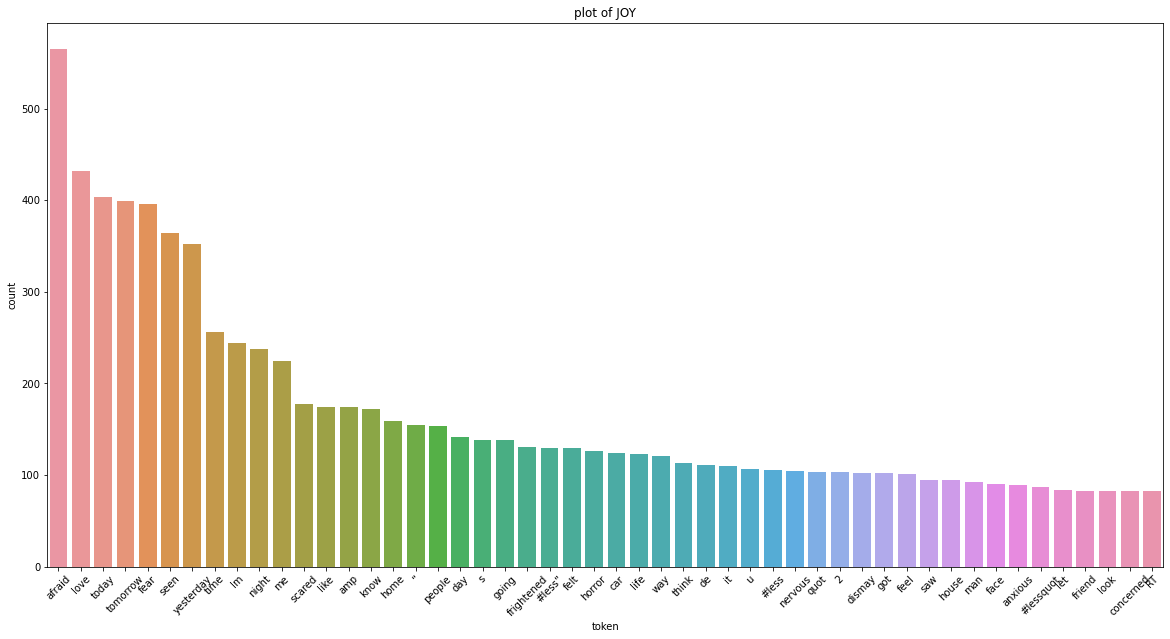

In [ ]:
plot_most_common_word(keyword_joy,"JOY")

In [ ]:
surprise_list = df1[df1['Emotion'] == 'shame']['Clened_text'].tolist()

surprise_docx =' '.join(surprise_list)
keyword_surprise = extract_keywords(surprise_docx)

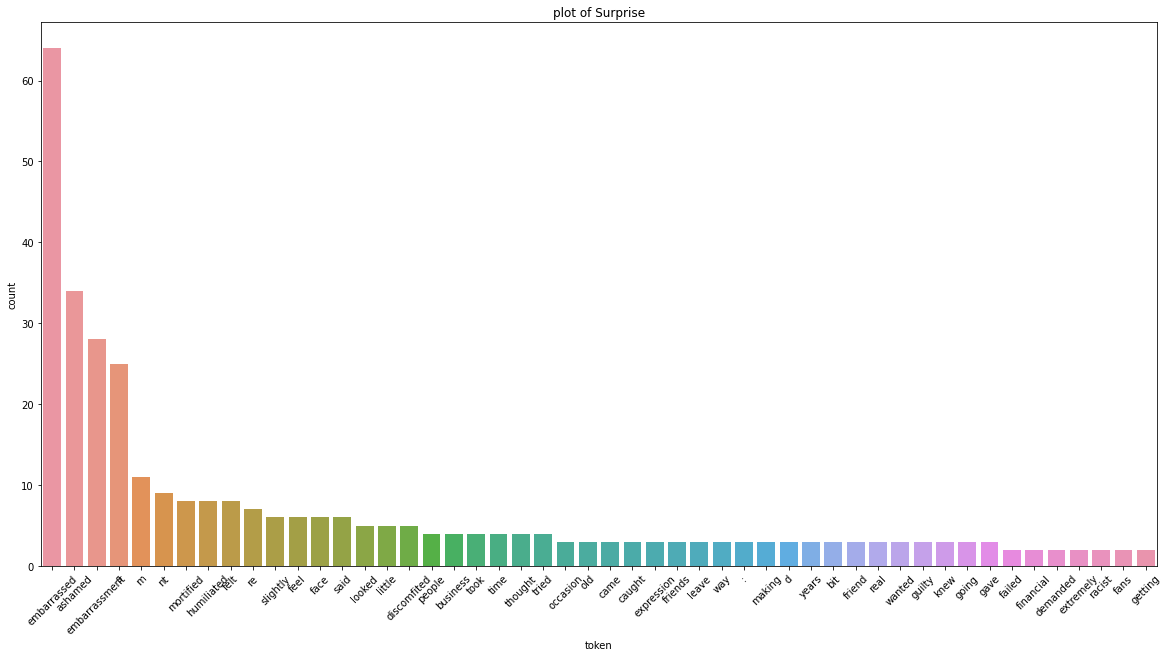

In [ ]:
plot_most_common_word(keyword_surprise,"Surprise")

In [ ]:
#form wordcloud install WordCloud

In [ ]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figSize=(20,10))
    plt.inshow(mywordcloud,interpolation = 'biliner')
    plt.axis('off')
    plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report,plot_confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xfeatures = df1['Clened_text']
ylabels = df1['Emotion']

In [ ]:
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clened_text, Length: 34792, dtype: object

In [ ]:
cv = CountVectorizer()
x= cv.fit_transform(Xfeatures)

In [ ]:
cv.get_feature_names()

['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12hrstwi

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,ylabels,test_size=0.3,random_state=30)

In [ ]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
nv_model.score(X_test,y_test)

0.5604521939068787

In [ ]:
y_pred_for_nv = nv_model.predict(X_test)

In [ ]:
y_pred_for_nv

array(['sadness', 'joy', 'joy', ..., 'sadness', 'joy', 'joy'], dtype='<U8')

In [ ]:
#makeing a single prediction



In [ ]:
sample_text = ['we are going to remove you from group']

In [ ]:
vect = cv.transform(sample_text).toarray()

In [ ]:
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [ ]:
nv_model.predict_proba(vect)

array([[1.05993455e-02, 2.83205832e-04, 7.40259422e-02, 4.58542948e-01,
        6.49418923e-06, 4.50535459e-01, 9.59043252e-08, 6.00650844e-03]])

In [ ]:
nv_model.classes_  

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [ ]:
np.max(nv_model.predict_proba(vect))

0.4585429484600843

In [ ]:
def predict_emotion(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction =model.predict(myvect)
    pred_proba =  np.max(model.pred_proba(myvect))
    predic_percentage_for_all = dict(zip(model.classes_,predict_proba))
    return predic_percentage_for_all

In [ ]:
predict_emotion(sample_text,nv_model)

AttributeError: 'MultinomialNB' object has no attribute 'pred_proba'

In [ ]:
predict_emotion([' he hates running all day'].nv_model)

AttributeError: 'list' object has no attribute 'nv_model'

In [ ]:
#model eveluation
print(classification_report(y_test,y_pred_for_nv ))

              precision    recall  f1-score   support

       anger       0.66      0.47      0.55      1320
     disgust       0.42      0.03      0.06       237
        fear       0.73      0.59      0.65      1620
         joy       0.50      0.86      0.64      3280
     neutral       0.35      0.03      0.06       698
     sadness       0.56      0.53      0.54      2052
       shame       1.00      0.02      0.05        43
    surprise       0.63      0.27      0.38      1188

    accuracy                           0.56     10438
   macro avg       0.61      0.35      0.37     10438
weighted avg       0.57      0.56      0.53     10438



In [ ]:
confusion_matrix(y_test,y_pred_for_nv)

NameError: name 'confusion_matrix' is not defined

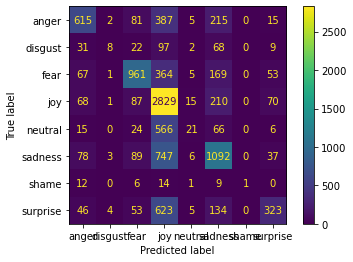

In [ ]:
plot_confusion_matrix(nv_model,X_test,y_test)

In [ ]:
import joblib


In [ ]:
pip install joblib

In [ ]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: nbclient<0.6.0,>=0.5.0 in c:\users\hp\anaconda3\lib\site-packages (from nbconvert) (0.5.3)

